# Implementing linear regression in Python

## Example: 2007 West Coast Ocean Acidification Cruise 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import pingouin as pg

import PyCO2SYS as pyco2

/Users/tconnolly/opt/miniconda3/envs/data-book/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/tconnolly/opt/miniconda3/envs/data-book/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


ModuleNotFoundError: No module named 'PyCO2SYS'

## Load data

##### Load 2007 data

In [2]:
filename07 = 'wcoa_cruise_2007/32WC20070511.exc.csv'
df07 = pd.read_csv(filename07,header=29,na_values=-999,parse_dates=[[6,7]])

In [3]:
df07.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'SAMPNO', 'LINE', 'STNNBR',
       'CASTNO', 'LATITUDE', 'LONGITUDE', 'BOT_DEPTH', 'BTLNBR',
       'BTLNBR_FLAG_W', 'CTDPRS', 'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W', 'OXYGEN',
       'OXYGEN_FLAG_W', 'SILCAT', 'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W',
       'NITRIT', 'NITRIT_FLAG_W', 'PHSPHT', 'PHSPHT_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W'],
      dtype='object')

### Linear regression: four methods in Python

Create $x$ and $y$ variables.

In [4]:
x = df07['PHSPHT']
y = df07['NITRAT']

Plot data.

Text(0, 0.5, 'nitrate')

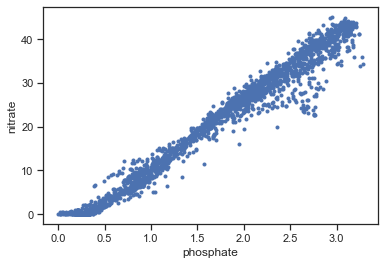

In [5]:
plt.figure()
plt.plot(x,y,'.')
plt.xlabel('phosphate')
plt.ylabel('nitrate')

Create a subset where both variables have finite values.

In [6]:
ii = np.isfinite(x+y)

In [7]:
ii

0       True
1       True
2       True
3       True
4       True
        ... 
2343    True
2344    True
2345    True
2346    True
2347    True
Length: 2348, dtype: bool

#### Method 1: Scipy

In [9]:
result = stats.linregress(x[ii],y[ii])

In [10]:
result

LinregressResult(slope=14.740034517902107, intercept=-3.9325720551997954, rvalue=0.9860645445968036, pvalue=0.0, stderr=0.05292378356970245, intercept_stderr=0.10258209230911518)

In [11]:
result.slope

14.740034517902107

Exercise: Draw the regression line with the data

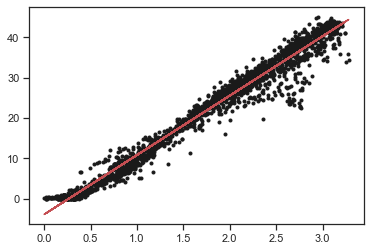

In [12]:
plt.figure()
plt.plot(x,y,'k.')
plt.plot(x,result.slope*x+result.intercept,'r-')

#### Method 2: statsmodels

Ordinary least squares fit using [statsmodels](https://www.statsmodels.org/).

In [16]:
smres = smf.ols('NITRAT ~ PHSPHT',df07).fit()

In [17]:
smres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NITRAT   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 7.757e+04
Date:                Tue, 22 Feb 2022   Prob (F-statistic):               0.00
Time:                        21:22:25   Log-Likelihood:                -4993.9
No. Observations:                2210   AIC:                             9992.
Df Residuals:                    2208   BIC:                         1.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9326      0.103    -38.336      0.000      -4.134      -3.731
PHSPHT        14.7400      0.053    278.514      0.000      14.636      14.844
==============================================================================
Omnibus:                      874.728   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5147.310
Skew:                          -1.766   Prob(JB):                         0.00
Kurtosis:                       9.589   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Method 3: pingouin

In [18]:
pg.linear_regression(x[ii],y[ii])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-3.932572,0.102582,-38.335853,6.540950e-247,0.972323,0.972311,-4.133740,-3.731405
1,PHSPHT,14.740035,0.052924,278.514375,0.000000e+00,0.972323,0.972311,14.636249,14.843820
